### Machine Learning Cookbook

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# creating a vector as a row
vector_row = np.array([1,2,3])
# as a column
vector_column = np.array([[1],
                        [2],
                        [3]])



In [3]:
# sparse matrix (reduce una matrix de muchos ceros a nonzeros)
from scipy import sparse
matrix = np.array([[0, 0],
                    [0, 1],
                    [3, 0]])
matrix_sparse = sparse.csr_matrix(matrix)
print(matrix)
print(matrix_sparse)

[[0 0]
 [0 1]
 [3 0]]
  (1, 1)	1
  (2, 0)	3


### Panda

In [2]:
from sklearn import datasets

digits = datasets.load_digits()
features = digits.data
features

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [3]:
target = digits.target
target

array([0, 1, 2, ..., 8, 9, 8])

In [7]:
from sqlalchemy import create_engine
import sqlite3
import pandas as pd
# Create your connection.
cnx = sqlite3.connect(r"C:\Users\gonza\OneDrive\Documentos\datascience-thebridge-master\Curso_Udemy_SQL\sakila.db")

df = pd.read_sql_query("SELECT * FROM customer", cnx)
df.head(3)

,customer_id,store_id,first_name,last_name,email,address_id,active,create_date,last_update
0,1,1,MARY,SMITH,MARY.SMITH@sakilacustomer.org,5,1,2006-02-14 22:04:36.000,2019-04-11 18:11:49
1,2,1,PATRICIA,JOHNSON,PATRICIA.JOHNSON@sakilacustomer.org,6,1,2006-02-14 22:04:36.000,2019-04-11 18:11:49
2,3,1,LINDA,WILLIAMS,LINDA.WILLIAMS@sakilacustomer.org,7,1,2006-02-14 22:04:36.000,2019-04-11 18:11:49


In [17]:
df_store = pd.read_sql_query("select store_id, count(*) as total,avg(active) as media_activos from customer group by 1 order by 2",cnx)

df_store

                               

,store_id,total,media_activos
0,2,273,0.974359
1,1,326,0.975460


In [19]:
# group by
url = r"C:\Users\gonza\OneDrive\Documentos\datascience-thebridge-master\ejercicios gonzalo\DATA\Titanic\titanic.csv"
dataframe = pd.read_csv(url)
dataframe.groupby(["Sex","Survived"])["Age"].mean()

Sex     Survived
female  0           24.419753
        1           28.866953
male    0           31.136853
        1           27.428165
Name: Age, dtype: float64

In [20]:
# grouping by time
# create date range
time_index = pd.date_range("06/06/2017",periods=100000,freq="30S") # cada 30 segundos
# create dataframe
datadate = pd.DataFrame(index=time_index)
# create column with random values
datadate["Sale_Amount"] = np.random.randint(1,10,100000)
datadate.head(3)

,Sale_Amount
2017-06-06 00:00:00,1
2017-06-06 00:00:30,8
2017-06-06 00:01:00,7


In [22]:
# group by week
datadate.resample("M",label="left").sum() # label, muestra el primer dia desde que se cuenta

,Sale_Amount
2017-05-31,359674
2017-06-30,140799


In [25]:
# show first two names uppercased
[name.upper() for name in dataframe["Name"][:2]]

['MR. OWEN HARRIS BRAUND',
 'MRS. JOHN BRADLEY (FLORENCE BRIGGS THAYER) CUMINGS']

In [26]:
#Applying a Function Over All Elements in a Column
def uppercase(x):
    return x.upper()

dataframe["Name"].apply(uppercase)[:2]

0                               MR. OWEN HARRIS BRAUND
1    MRS. JOHN BRADLEY (FLORENCE BRIGGS THAYER) CUM...
Name: Name, dtype: object

In [28]:
# apply y group by
dataframe.groupby("Sex").apply(lambda x:x.mean())  

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
Sex,,,,,,
female,0.742038,2.159236,27.719745,0.694268,0.649682,44.479818
male,0.190227,2.385689,30.431361,0.432810,0.237347,25.633935


In [ ]:
# create a row and append to dataframe
row = pd.Series([10,"Chris","Chillon"],index=["id","frist","last"])
#dataframe_a.append(row,ignore_index=True)

### Handling Numerical Data

In [29]:
#You need to rescale the values of a numerical feature to be between two values
from sklearn import preprocessing

feature = np.array([[-500.5],
[-100.1],
[0],
[100.1],
[900.9]])
# create scaler
minmax_Scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
scaled_feature = minmax_Scaler.fit_transform(feature)
scaled_feature
                     

array([[0.        ],
       [0.28571429],
       [0.35714286],
       [0.42857143],
       [1.        ]])

3.138680000000002


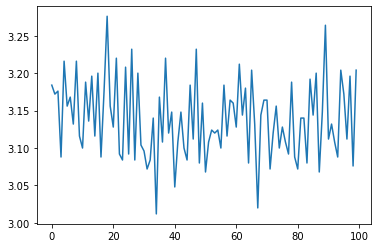

In [2]:
# monte carlo
pi_avg = 0
n = 1000
pi_value_list = []
for i in range(100):
    value = 0
    x = np.random.uniform(0,1,n).tolist()
    y = np.random.uniform(0,1,n).tolist()
    for j in range(n):
        z = np.sqrt(x[j]*x[j] + y[j]*y[j])
        if z <=1:
            value +=1
    float_value = float(value)
    pi_value = float_value * 4 /n
    pi_value_list.append(pi_value)
    pi_avg += pi_value

pi = pi_avg/100

print(pi)
plt.plot(pi_value_list)
plt.show()
